In [1]:
import sys
sys.path.insert(0, 'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Hofstadter')
from square_tight_binding import *
from Periodic_BC_Hofstadter_Hamiltonian_Matrix import *

lx= 12 , ly= 12


In [2]:
#If You Want To See Flat Bands You Have To Choose To Lattice Size is 12x12 and alpha=1/3

In [3]:
alpha=1/3

In [4]:
#Calculate the Eigenvalues of Periodic Hamiltonian
eigenValues_R, eigenVectors_R = np.linalg.eig(PerHMat(alpha))
idx = np.argsort(eigenValues_R)
sorted_R = eigenValues_R[idx]*np.exp((-np.pi/2)*(1-alpha)) 

In [5]:
#Hopping Parameter
t = 1

#Definition of Kapit-Mueller Model
def Kapit_Mueller_Hamiltonian(alpha, L_x, L_y):
    H = np.zeros((L_x*L_y, L_x*L_y), dtype=complex)
    for j in range(L_x*L_y):
        for k in range(L_y*L_x):
            if j!=k:
                x_j = xy[j, 0] #x coordinates of jth lattice site
                y_j = xy[j, 1] #y coordinates of jth lattice site
                x_k = xy[k, 0] #x coordinates of kth lattice site
                y_k = xy[k, 1] #y coordinates of kth lattice site
                #Definitions of Complex Notation
                z_j = x_j + 1j*y_j
                z_k = x_k + 1j*y_k
                for n in range(-1,2):
                    for m in range(-1,2):
                        R = n*L_x+1j*m*L_y
                        z = (z_k - z_j)+R #It must be not equal to zero!
                        G = (-1)**(np.real(z)+np.imag(z)+np.real(z)*np.imag(z))
                        #Definitions of Phase Arguments
                        beta = (np.pi/2)*((z_j*np.conjugate(z))-(np.conjugate(z_j)*z))*alpha
                        W = t*G*np.exp(-np.pi/2*(1-alpha)*(np.absolute(z)**2))
                        J = W*np.exp(beta)*np.exp(np.pi/2*((z_j*np.conjugate(R))-(np.conjugate(z_j)*R))*alpha) #Long Range Phase Factor (New Phase- one way)
                        H[j][k]=H[j][k]+J
    return H

In [7]:
eigenValues_K, eigenVectors_K = np.linalg.eig(Kapit_Mueller_Hamiltonian(alpha, L_x, L_y))
idx = np.argsort(eigenValues_K)
sorted_K = eigenValues_K[idx]

C:\Users\Can\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


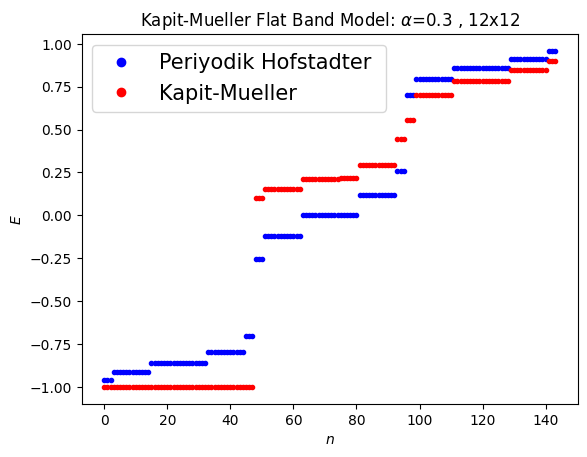

In [8]:
#Plot Kapit-Mueller Model
import matplotlib.pyplot  as plt
fig, ax = plt.subplots()
x_axis = np.arange(0, L_x*L_y, 1)
y_axis_Kapit = sorted_K
y_axis_Real = sorted_R
plt.xlabel(r'$n$')
plt.ylabel(r'$E$')
plt.title(r'Kapit-Mueller Flat Band Model: $\alpha$='+str(np.round(alpha,1))+' , '+str(L_x)+'x'+str(L_y)+'')
plt.plot(x_axis, y_axis_Real, 'bo', markersize=3, label='Periyodik Hofstadter ')
plt.plot(x_axis, y_axis_Kapit, 'ro',markersize=3, label='Kapit-Mueller')
plt.legend(markerscale=2, fontsize=15, loc='upper left')
plt.show()